In [ ]:
import pandas as pd
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.ext.automap import automap_base
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import  SVR

from flask import (
    Flask,
    render_template,
    jsonify,
    request,
    redirect)

In [ ]:
data_03 = pd.read_excel ('BronxPropertySalesDatasets/sales_bronx_03.xls')
data_04 = pd.read_excel ('BronxPropertySalesDatasets/sales_bronx_04.xls')
data_05 = pd.read_excel ('BronxPropertySalesDatasets/sales_bronx_05.xls')
data_06 = pd.read_excel ('BronxPropertySalesDatasets/sales_bronx_06.xls')
data_07 = pd.read_excel ('BronxPropertySalesDatasets/sales_2007_bronx.xls')
data_08 = pd.read_excel ('BronxPropertySalesDatasets/sales_2008_bronx.xls')
data_09 = pd.read_excel ('BronxPropertySalesDatasets/2009_bronx.xls')
data_10 = pd.read_excel ('BronxPropertySalesDatasets/2010_bronx.xls')
data_11 = pd.read_excel ('BronxPropertySalesDatasets/2011_bronx.xls')
data_12 = pd.read_excel ('BronxPropertySalesDatasets/2012_bronx.xls')
data_13 = pd.read_excel ('BronxPropertySalesDatasets/2013_bronx.xls')
data_14 = pd.read_excel ('BronxPropertySalesDatasets/2014_bronx.xls')
data_15 = pd.read_excel ('BronxPropertySalesDatasets/2015_bronx.xls')
data_16 = pd.read_excel ('BronxPropertySalesDatasets/2016_bronx.xls')
data_17 = pd.read_excel ('BronxPropertySalesDatasets/2017_bronx.xls')
data_18 = pd.read_excel ('BronxPropertySalesDatasets/2018_bronx.xlsx')

In [ ]:
def prepare_data_3 ( df ):
    
    df = df [3:]
    df.columns = ['BOROUGH',
                 'NEIGHBORHOOD',
                 'BUILDING CLASS CATEGORY',
                 'TAX CLASS AS OF FINAL ROLL',
                 'BLOCK',
                 'LOT',
                 'EASE-MENT',
                 'BUILDING CLASS AT PRESENT',
                 'ADDRESS',
                 'APARTMENT NUMBER',
                 'ZIP CODE',
                 'RESIDENTIAL UNITS',
                 'COMMERCIAL UNITS',
                 'TOTAL UNITS',
                 'LAND SQUARE FEET',
                 'GROSS SQUARE FEET',
                 'YEAR BUILT',
                 'TAX CLASS AT TIME OF SALE',
                 'BUILDING CLASS AT TIME OF SALE',
                 'SALE PRICE',
                 'SALE DATE'
                ]
       
    return df

def prepare_data_4 ( df ):
    
    df = df [4:]
    df.columns = ['BOROUGH',
                 'NEIGHBORHOOD',
                 'BUILDING CLASS CATEGORY',
                 'TAX CLASS AS OF FINAL ROLL',
                 'BLOCK',
                 'LOT',
                 'EASE-MENT',
                 'BUILDING CLASS AT PRESENT',
                 'ADDRESS',
                 'APARTMENT NUMBER',
                 'ZIP CODE',
                 'RESIDENTIAL UNITS',
                 'COMMERCIAL UNITS',
                 'TOTAL UNITS',
                 'LAND SQUARE FEET',
                 'GROSS SQUARE FEET',
                 'YEAR BUILT',
                 'TAX CLASS AT TIME OF SALE',
                 'BUILDING CLASS AT TIME OF SALE',
                 'SALE PRICE',
                 'SALE DATE'
                ]
   
    return df


df_03 = prepare_data_3 (data_03)
df_04 = prepare_data_3 (data_04)
df_05 = prepare_data_3 (data_05)
df_06 = prepare_data_3 (data_06)
df_07 = prepare_data_3 (data_07)
df_08 = prepare_data_3 (data_08)
df_09 = prepare_data_3 (data_09)
df_10 = prepare_data_3 (data_10)
df_11 = prepare_data_4 (data_11)
df_12 = prepare_data_4 (data_12)
df_13 = prepare_data_4 (data_13)
df_14 = prepare_data_4 (data_14)
df_15 = prepare_data_4 (data_15)
df_16 = prepare_data_4 (data_16)
df_17 = prepare_data_4 (data_17)
df_18 = prepare_data_4 (data_18)

In [ ]:
df_17.head()

In [ ]:
total_data = df_03.append([df_04,
                           df_05,
                           df_06,
                           df_07,
                           df_08,
                           df_09,
                           df_10,
                           df_11,
                           df_12,
                           df_13,
                           df_14,
                           df_15,
                           df_16,
                           df_17,
                           df_18])
total_data




In [6]:
total_data = total_data.drop(['BOROUGH', 'TAX CLASS AS OF FINAL ROLL', 'BLOCK','APARTMENT NUMBER' , 'LOT', 'EASE-MENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE'], axis=1)
total_data

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
3,BATHGATE,01 ONE FAMILY HOMES,A1,4088 PARK AVENUE,10457,1,0,1,2700,1681,1901,0,2003-03-24 00:00:00
4,BATHGATE,01 ONE FAMILY HOMES,A1,1848 WASHINGTON AVENUE,10457,1,0,1,2943,2128,1920,130000,2003-05-27 00:00:00
5,BATHGATE,01 ONE FAMILY HOMES,A5,412 EAST 179 STREET,10457,1,0,1,1842,2048,1901,204000,2003-04-07 00:00:00
6,BATHGATE,01 ONE FAMILY HOMES,A5,410 EAST 182 STREET,10457,1,0,1,1330,1460,1899,235000,2003-07-24 00:00:00
7,BATHGATE,01 ONE FAMILY HOMES,S1,441 EAST 178 STREET,10457,1,1,2,1287,2378,1899,125500,2003-05-02 00:00:00
8,BATHGATE,01 ONE FAMILY HOMES,A1,461 EAST 178 STREET,10457,1,0,1,1782,1548,1899,215000,2003-05-14 00:00:00
9,BATHGATE,01 ONE FAMILY HOMES,A1,2058 BATHGATE AVENUE,10457,1,0,1,1173,1516,1910,0,2003-07-09 00:00:00
10,BATHGATE,01 ONE FAMILY HOMES,A5,2186 BATHGATE AVENUE,10457,1,0,1,1768,1188,1901,245000,2003-04-15 00:00:00
11,BATHGATE,01 ONE FAMILY HOMES,A9,503 EAST 182 STREET,10457,1,0,1,1960,1705,1901,500,2003-06-02 00:00:00
12,BATHGATE,01 ONE FAMILY HOMES,S0,2368 WASHINGTON AVENUE,10458,1,2,3,1911,4080,1931,375000,2003-04-08 00:00:00


In [7]:
total_data = total_data[total_data['SALE PRICE'] > 0]
total_data = total_data[total_data['GROSS SQUARE FEET'] > 0]
total_data

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
4,BATHGATE,01 ONE FAMILY HOMES,A1,1848 WASHINGTON AVENUE,10457,1,0,1,2943,2128,1920,130000,2003-05-27 00:00:00
5,BATHGATE,01 ONE FAMILY HOMES,A5,412 EAST 179 STREET,10457,1,0,1,1842,2048,1901,204000,2003-04-07 00:00:00
6,BATHGATE,01 ONE FAMILY HOMES,A5,410 EAST 182 STREET,10457,1,0,1,1330,1460,1899,235000,2003-07-24 00:00:00
7,BATHGATE,01 ONE FAMILY HOMES,S1,441 EAST 178 STREET,10457,1,1,2,1287,2378,1899,125500,2003-05-02 00:00:00
8,BATHGATE,01 ONE FAMILY HOMES,A1,461 EAST 178 STREET,10457,1,0,1,1782,1548,1899,215000,2003-05-14 00:00:00
10,BATHGATE,01 ONE FAMILY HOMES,A5,2186 BATHGATE AVENUE,10457,1,0,1,1768,1188,1901,245000,2003-04-15 00:00:00
11,BATHGATE,01 ONE FAMILY HOMES,A9,503 EAST 182 STREET,10457,1,0,1,1960,1705,1901,500,2003-06-02 00:00:00
12,BATHGATE,01 ONE FAMILY HOMES,S0,2368 WASHINGTON AVENUE,10458,1,2,3,1911,4080,1931,375000,2003-04-08 00:00:00
14,BATHGATE,02 TWO FAMILY HOMES,B2,1833 WASHINGTON AVENUE,10457,2,0,2,2800,1360,1931,300000,2003-12-12 00:00:00
17,BATHGATE,02 TWO FAMILY HOMES,B1,1538 WASHINGTON AVENUE,10457,2,0,2,2000,2400,1993,238000,2003-07-17 00:00:00


In [8]:
for f in ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(total_data[f].values))
    total_data[f] = lbl.transform(list(total_data[f].values))
    
total_data

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
4,1,1,A1,1848 WASHINGTON AVENUE,10457,1,0,1,2943,2128,1920,130000,2003-05-27 00:00:00
5,1,1,A5,412 EAST 179 STREET,10457,1,0,1,1842,2048,1901,204000,2003-04-07 00:00:00
6,1,1,A5,410 EAST 182 STREET,10457,1,0,1,1330,1460,1899,235000,2003-07-24 00:00:00
7,1,1,S1,441 EAST 178 STREET,10457,1,1,2,1287,2378,1899,125500,2003-05-02 00:00:00
8,1,1,A1,461 EAST 178 STREET,10457,1,0,1,1782,1548,1899,215000,2003-05-14 00:00:00
10,1,1,A5,2186 BATHGATE AVENUE,10457,1,0,1,1768,1188,1901,245000,2003-04-15 00:00:00
11,1,1,A9,503 EAST 182 STREET,10457,1,0,1,1960,1705,1901,500,2003-06-02 00:00:00
12,1,1,S0,2368 WASHINGTON AVENUE,10458,1,2,3,1911,4080,1931,375000,2003-04-08 00:00:00
14,1,5,B2,1833 WASHINGTON AVENUE,10457,2,0,2,2800,1360,1931,300000,2003-12-12 00:00:00
17,1,5,B1,1538 WASHINGTON AVENUE,10457,2,0,2,2000,2400,1993,238000,2003-07-17 00:00:00


In [9]:
X = total_data[['GROSS SQUARE FEET', 'TOTAL UNITS', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']] 
Y = total_data['SALE PRICE']

In [10]:
model = LinearRegression()

model.fit(X, Y)

score = model.score(X, Y)
print(f"R2 Score: {score}")

R2 Score: 0.2616801687381455


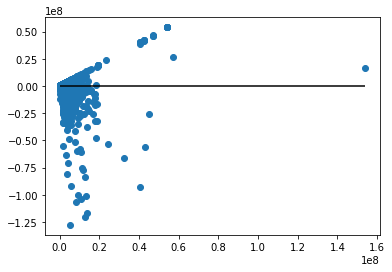

In [11]:
predictions = model.predict(X)
plt.scatter(predictions, predictions - Y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predicted = model.predict(X_test)
predicted

array([1817846.902703  ,  504133.54734007,  460005.55003169, ...,
        588719.62698997,  681575.5046254 ,  624659.70191657])

In [19]:
X_test.head()

,GROSS SQUARE FEET,TOTAL UNITS,NEIGHBORHOOD,BUILDING CLASS CATEGORY
856,3500,1,12,49
397,1512,2,3,5
3354,2048,2,50,4
8254,2730,2,68,5
349,1890,2,3,4


In [23]:
a = [[1222, 2, 4, 5]]
#a = a.reshape(1, -1)
model.predict(a)

array([493966.54912555])